# Configurations and Stylesheets

We'll walk through some of Matplotlib's runtime configuration (rc) options, and take a look at the newer stylesheets feature, which contains some nice sets of default configurations.

## Plot customization by hand

In [1]:
import matplotlib.pyplot as plt
plt.style.use('classic')
import numpy as np

%matplotlib inline

(array([  7.,  17.,  57., 135., 216., 249., 183.,  95.,  31.,  10.]),
 array([-3.31944323, -2.69471174, -2.06998026, -1.44524877, -0.82051728,
        -0.19578579,  0.4289457 ,  1.05367719,  1.67840868,  2.30314016,
         2.92787165]),
 <a list of 10 Patch objects>)

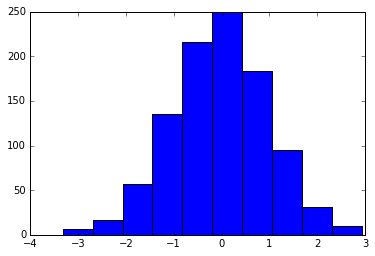

In [2]:
x = np.random.randn(1000)
plt.hist(x)

Adjust this by hand to make it a much more visually pleasing plot:

(array([  7.,  17.,  57., 135., 216., 249., 183.,  95.,  31.,  10.]),
 array([-3.31944323, -2.69471174, -2.06998026, -1.44524877, -0.82051728,
        -0.19578579,  0.4289457 ,  1.05367719,  1.67840868,  2.30314016,
         2.92787165]),
 <a list of 10 Patch objects>)

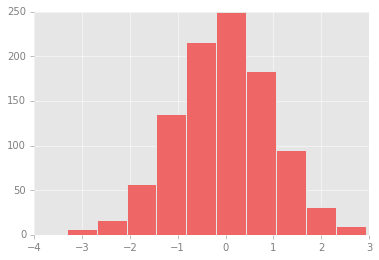

In [12]:
# Use a gray background
ax = plt.axes(facecolor='#E6E6E6')
ax.set_axisbelow(True)

# Draw solid white grid lines
plt.grid(color='w', linestyle='solid')

# Hide axis spines
for spine in ax.spines.values():
    spine.set_visible(False)
    
# Hide top and right ticks
ax.xaxis.tick_bottom()
ax.yaxis.tick_left()

# Lighten ticks and labels
ax.tick_params(colors='gray', direction='out')
for tick in ax.get_xticklabels():
    tick.set_color('gray')
for tick in ax.get_yticklabels():
    tick.set_color('gray')
    
# Control face and edge color of histogram
ax.hist(x, edgecolor='#E6E6E6', color='#EE6666')

This looks better, but takes a whole lot of effort!!!
Fortunately, there is a way to adjust these defaults once in a way that will work for all plots.

## Changing the defaults: `rcParams`

Each time Matplotlib loads, it defines a runtime configuration (rc) containing the default styles for every plot element you create. This configuration can be adjusted at any time using the `plt.rc` convenience routine. 

In [16]:
IPython_default = plt.rcParams.copy()
# IPython_default

Use the plt.rc function to change some of these settings:

In [19]:
from matplotlib import cycler

colors = cycler('color',
                ['#EE6666', '#3388BB', '#9988DD',
                 '#EECC55', '#88BB44', '#FFBBBB'])
plt.rc('axes', facecolor='#E6E6E6', edgecolor='none',
       axisbelow=True, grid=True, prop_cycle=colors)
plt.rc('grid', color='w', linestyle='solid')
plt.rc('xtick', direction='out', color='gray')
plt.rc('ytick', direction='out', color='gray')
plt.rc('patch', edgecolor='#E6E6E6')
plt.rc('lines', linewidth=2)

Create some plots and see our settings in action:

(array([  7.,  17.,  57., 135., 216., 249., 183.,  95.,  31.,  10.]),
 array([-3.31944323, -2.69471174, -2.06998026, -1.44524877, -0.82051728,
        -0.19578579,  0.4289457 ,  1.05367719,  1.67840868,  2.30314016,
         2.92787165]),
 <a list of 10 Patch objects>)

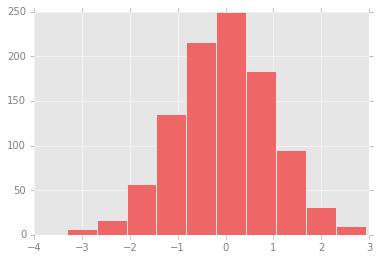

In [18]:
plt.hist(x)

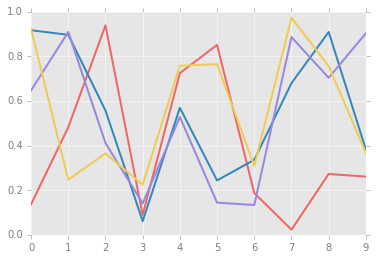

In [20]:
for i in range(4):
    plt.plot(np.random.rand(10))

The customized settings can be saved in a *.matplotlibrc* file.

## Stylesheets

The available styles are listed in `plt.style.available`

In [22]:
plt.style.available[:5]

['seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-ticks',
 'fivethirtyeight',
 'seaborn-whitegrid']

The basic way to switch to a stylesheet: 
```python
plt.style.use('stylename')
```

Keep in mind that this will change the style for the rest of the session! Alternatively, you can use the style context manager, which sets a style temporarily:

```python
with plt.style.context('stylename'):
    make_a_plot()
```

Create a function that will make two basic types of plot:

In [23]:
def hist_and_lines():
    np.random.seed(0)
    fig, ax = plt.subplots(1, 2, figsize=(11, 4))
    ax[0].hist(np.random.randn(1000))
    for i in range(3):
        ax[1].plot(np.random.rand(10))
    ax[1].legend(['a', 'b', 'c'], loc='lower left')

### Default style

In [24]:
# Reset rcParams
plt.rcParams.update(IPython_default)

/usr/local/anaconda3/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  self[key] = other[key]
/usr/local/anaconda3/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/usr/local/anaconda3/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]
/usr/local/anaconda3/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/usr/local/anaconda3/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbo

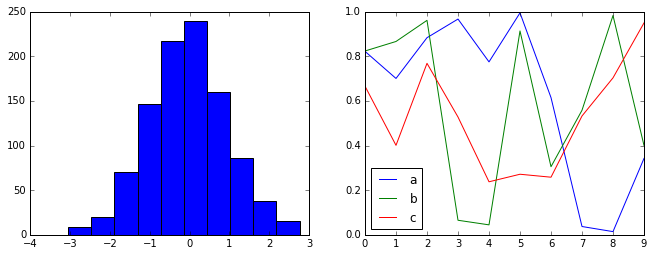

In [26]:
hist_and_lines()

### FiveThirtyEight style

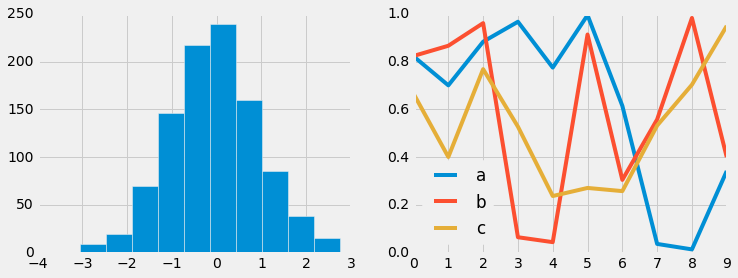

In [27]:
with plt.style.context('fivethirtyeight'):
    hist_and_lines()

### ggplot

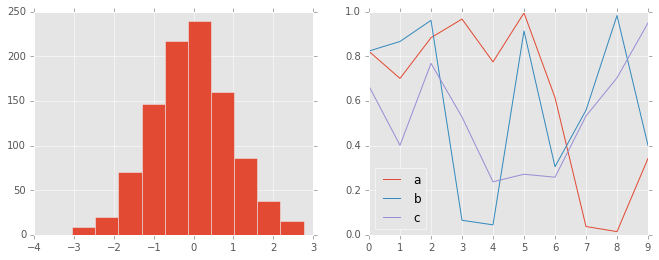

In [28]:
with plt.style.context('ggplot'):
    hist_and_lines()

### *Bayesian Methods for Hackers( style

There is a very nice short online book called [*Probabilistic Programming and Bayesian Methods for Hackers*](http://camdavidsonpilon.github.io/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/); it features figures created with Matplotlib, and uses a nice set of rc parameters to create a consistent and visually-appealing style throughout the book. This style is reproduced in the `bmh` stylesheet:

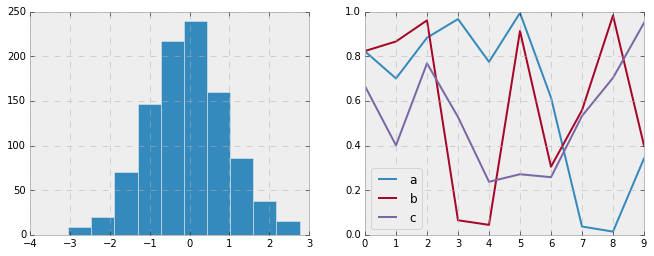

In [29]:
with plt.style.context('bmh'):
    hist_and_lines()


### Dark background

For figures used within presentations

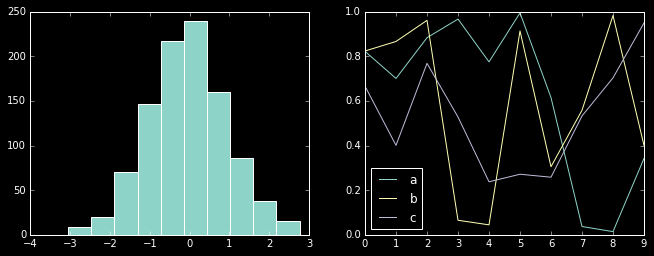

In [30]:
with plt.style.context('dark_background'):
    hist_and_lines()

### Grayscale

For figures for a print publication that does NOT accept color figures.

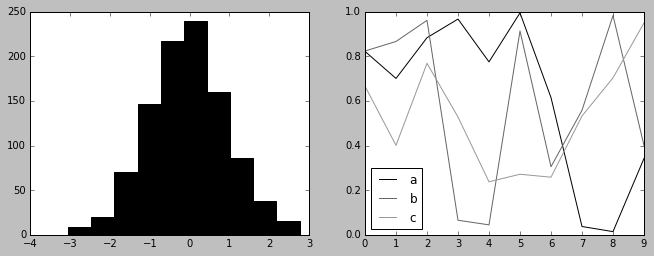

In [31]:
with plt.style.context('grayscale'):
    hist_and_lines() 

### Seaborn style

I've found these settings to be very nice, and tend to use them as defaults in my own data exploration.

In [33]:
import seaborn

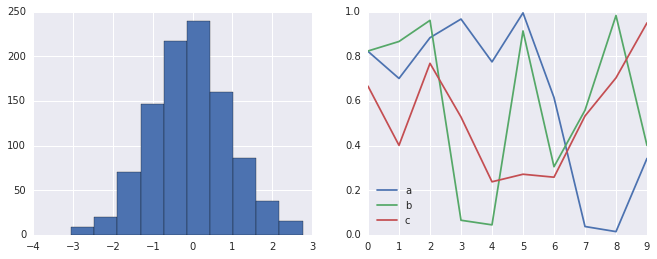

In [35]:
with plt.style.context('seaborn'):
    hist_and_lines()